



# Газопроницаемость

Оценка газопроницаемости тканей с двусторонним покрыттием (резиновым или ПВХ) для проекта СТО ВГУ ОТУ.

Будет проведена попытка оценки двумя методами:

- первый - на основании установ   ленного требования по ГОСТ
- второй - на основании установленного требования к уменьшению давления в ВГУ

## Исходные данные

### Газопроницаемость реальных материалов

Газопроницаемость ПВХ-ткани в открытых источниках найти не удалось.

Газопроницаемость ПВХ

 Значение | Единица измерения | Ссылка
:--------:|:-----------------:|:-------:
xx | xx | [ссылка](https://www.quora.com/How-long-can-a-human-survive-in-an-inflatable-plastic-bubble-with-a-2-meter-diameter)

<!--  TODO Заполнить -->

Газопроницаемость других материалов (для сравнения)

 Материал | Газ | Значение | Единица измерения | Ссылка | Примечание
:--------:|:---:|:--------:|:-----------------:|:------:|:-----------:
Поливинилиденхлорид | Кислород | 2.6 | см³ \* 0.2 микрометра / (м² \* сутки * атмосферу) | [ссылка](https://www.quora.com/How-long-can-a-human-survive-in-an-inflatable-plastic-bubble-with-a-2-meter-diameter) | Указано, что хороший барьер




## Метод 1

В первом методе выведем значения газопроницаемости по двум оставшимся ГОСТам по значению, которое установлено сейчас для первого ГОСТа

### ГОСТ

### ГОСТ

## Метод 2

In [7]:
from sympy import Symbol, plot

In [5]:
x = Symbol('x')
y = x ** 2
y

x**2

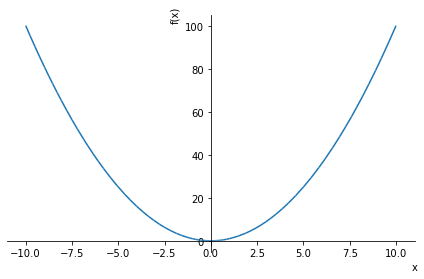

In [8]:
plot(y)

In [1]:
from pint import UnitRegistry
ureg = UnitRegistry()

In [4]:
P1_UOM = ureg.meter / ureg.second

In [5]:
P1_UOM

<Unit('meter / second')>